# Logistic Regression
---

Source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### **Aditional Content**

Linear Models: https://scikit-learn.org/stable/modules/linear_model.html

Linear vs Logistic Regression: https://www.analyticsvidhya.com/blog/2020/12/beginners-take-how-logistic-regression-is-related-to-linear-regression/

### **Important f@#k note:** Although its name, Logistic Regression is **Classification** algorithm
Read more: https://kambria.io/blog/logistic-regression-for-machine-learning/

## Example 1

In [109]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [110]:
x, y = load_iris(return_X_y=True)

print('shape of x:', x.shape)
print('shape of y:', y.shape)

clf = LogisticRegression(random_state=0).fit(x, y)
clf.predict(x[:2, :])
clf.score(x, y)

shape of x: (150, 4)
shape of y: (150,)
/Users/odair/.local/share/virtualenvs/python-for-data-science-FapMMdLP/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9733333333333334

## Example 2
### (Standard Scale)

In [111]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [112]:
X, y = make_classification(n_samples=10, random_state=99)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [113]:
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [114]:
pipe.score(X_test, y_test)

0.6666666666666666

---

## Exercise
### (Classification)


This is a very simple Machine Learning example.

The model "learns" when you should take a coat outside, based on the temperature.


**Model:** Logistic Regression

**Feature:** Temperature

**Labels:** True|False values (Coat or no coat)

### Using values

In [115]:
temperature = [[-1], [30], [12], [14], [18], [25], [5], [15], [27], [35], [41]]
coat = [True, False, True, True, True, False, True, True, False, False, False]

## Solution 1
### (With NO Standard Scaler)

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
X = temperature
y = coat

clf = LogisticRegression(max_iter=100).fit(X, y)

In [118]:
clf.predict(X)

array([ True, False,  True,  True,  True, False,  True,  True, False,
       False, False])

In [119]:
clf.predict_proba(X)

array([[8.23061727e-08, 9.99999918e-01],
       [9.97999226e-01, 2.00077436e-03],
       [1.04068383e-03, 9.98959316e-01],
       [4.43577284e-03, 9.95564227e-01],
       [7.53583668e-02, 9.24641633e-01],
       [9.29507437e-01, 7.04925632e-02],
       [6.43897405e-06, 9.99993561e-01],
       [9.13021708e-03, 9.90869783e-01],
       [9.82576800e-01, 1.74232003e-02],
       [9.99947007e-01, 5.29934716e-05],
       [9.99999323e-01, 6.77420076e-07]])

In [120]:
clf.score(X, y)

1.0

In [121]:
clf.predict([[22], [21], [10], [32], [25], [19], [4]])

array([False,  True,  True, False, False,  True,  True])

### Plotting
Source: https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html#sphx-glr-auto-examples-linear-model-plot-logistic-py

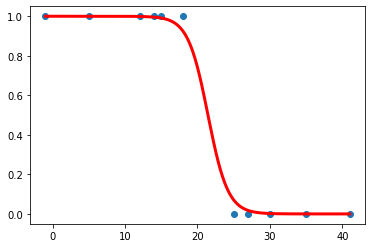

In [122]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit

plt.scatter(X, y)

max_x = max(X)[0]
min_x = min(X)[0]
X_test = np.linspace(min_x, max_x, max_x ** 2)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)
plt.show()

## Solution 2
### (With Standard Scaler)
Source: https://scikit-learn.org/stable/modules/preprocessing.html

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [124]:
X = temperature
y = coat

In [125]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [126]:
pipe.predict(X)

array([ True, False,  True,  True,  True, False,  True,  True, False,
       False, False])

In [127]:
pipe.predict_proba(X)

array([[0.0479118 , 0.9520882 ],
       [0.73270087, 0.26729913],
       [0.21200937, 0.78799063],
       [0.25827726, 0.74172274],
       [0.36839369, 0.63160631],
       [0.58990786, 0.41009214],
       [0.09836238, 0.90163762],
       [0.28374   , 0.71626   ],
       [0.65055925, 0.34944075],
       [0.83931685, 0.16068315],
       [0.91885536, 0.08114464]])

In [128]:
pipe.score(X, y)

1.0

In [129]:
pipe.predict([[22], [21], [10], [32], [25], [19], [23]])

array([ True,  True,  True, False, False,  True, False])

In [130]:
pipe.predict([[22], [21], [10], [32], [25], [19], [4]])

array([ True,  True,  True, False, False,  True,  True])